# ANN Model for MNIST dataset
----
I used `torchvision datasets` for import MNIST dataset

In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets,transforms

%matplotlib inline

In [2]:
# download datasets
train_data = datasets.MNIST(
    root='data',
    train = True,
    download=True,
    transform=transforms.ToTensor())

test_data = datasets.MNIST(
    root='data',
    train = False,
    download=True,
    transform=transforms.ToTensor())

In [3]:
# print information of datasets
print("train data: ", train_data, "\n\n")
print("test data: ", test_data)

train data:  Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() 


test data:  Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [4]:
# use DaraLoader for batching datasets
train_loader = DataLoader(train_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=test_data.targets.size()[0])

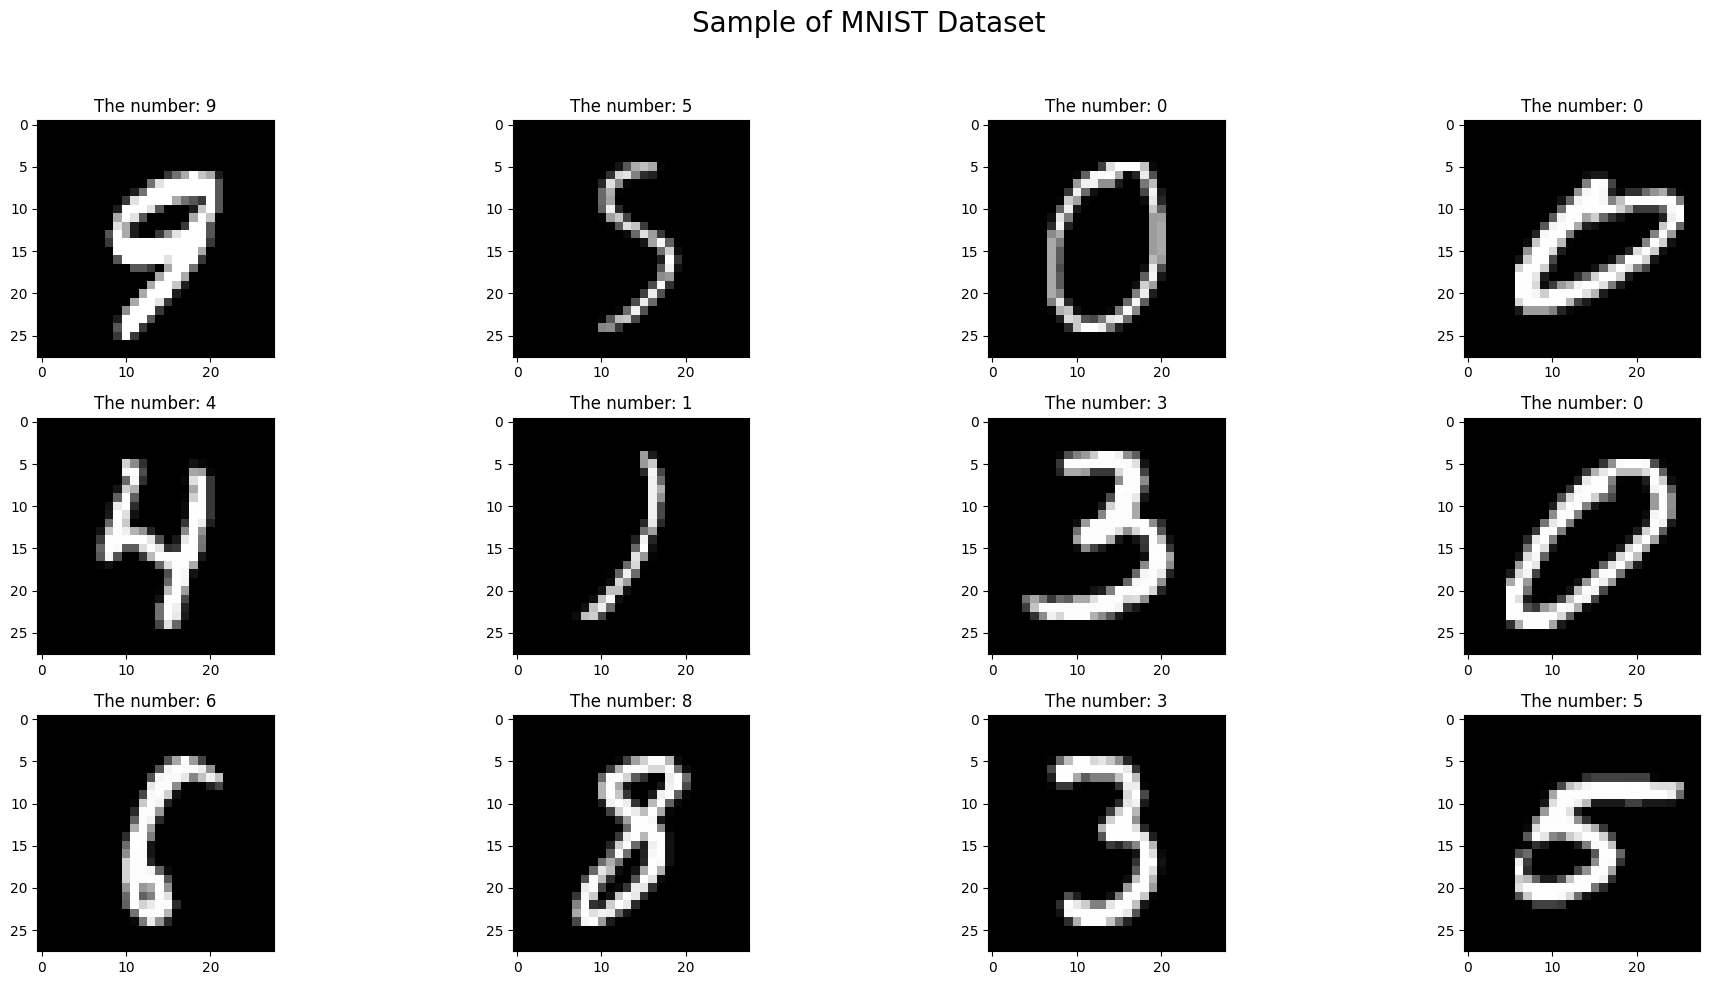

In [5]:
# schow 12 randomly iamges
fig,axs = plt.subplots(3,4,figsize=(20,10))
for ax in axs.flatten():
  # pick a random image
  random_index = np.random.randint(0,high=train_data.targets.size(0))
  img, label = train_data[random_index]
  ax.imshow(img.numpy()[0], cmap='gray')
  ax.set_title(f'The number: {label}')

plt.suptitle('Sample of MNIST Dataset',fontsize=20)
plt.tight_layout(rect=[0,0,1,.95])
plt.show()

In [6]:
print("Size of data: ", train_data.data.size())
print("Size of target: ", train_data.targets.size())

Size of data:  torch.Size([60000, 28, 28])
Size of target:  torch.Size([60000])


In [7]:
# create ANN model for MNIST 
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(784, 64)
        
        self.hidden_layer_01 = nn.Linear(64,32)
        self.hidden_layer_02 = nn.Linear(32,32)
        
        self.output = nn.Linear(32,10)
        
    def forward(self, x):
        x = torch.flatten(x, start_dim=1) # Because data shape is (28*28) for ANN must at first flatten
        x = F.relu(self.input(x))
        x = F.relu(self.hidden_layer_01(x))
        x = F.relu(self.hidden_layer_02(x))
        x = self.output(x)   
        return torch.log_softmax(x, axis=1) # We use NLLLoss function for this
        

In [8]:
# config model, loss function, and optimizer
net = Net()
loss = nn.NLLLoss() # Because we use log softmax at the end of Model
optimizer = torch.optim.Adam(net.parameters(), lr=.01)

In [9]:
# train function 
def train(epoch):
    train_accuracy  = []
    losses  = torch.zeros(epoch)
    
    for epochi in range(epoch):
        batchAcc  = []
        batchLoss = []
        
        for X,y in train_loader:
            yHAT = net(X)
            lossfun = loss(yHAT, y)

            # 
            optimizer.zero_grad()
            lossfun.backward()
            optimizer.step()
            
            # Evaluate Metrics for this Batch
            batchLoss.append(lossfun.item())
            batchAcc.append( 100*torch.mean((torch.argmax(yHAT,axis=1) == y).float())) 
            
        # and get average losses across the batches
        losses[epochi] = np.mean(batchLoss)
        train_accuracy.append(np.mean(batchAcc))
        
        print(f"Epoch: {epochi + 1}, Loss:  {losses[epochi].item()}, Accuracy: {train_accuracy[epochi]}")
        
    return net, losses, train_accuracy

In [10]:
# train ANN model
net, losses, train_accuracy = train(200)

Epoch: 1, Loss:  0.3175811469554901, Accuracy: 90.88333129882812
Epoch: 2, Loss:  0.20319214463233948, Accuracy: 94.44166564941406
Epoch: 3, Loss:  0.17818690836429596, Accuracy: 95.23500061035156
Epoch: 4, Loss:  0.16351820528507233, Accuracy: 95.80500030517578
Epoch: 5, Loss:  0.15185706317424774, Accuracy: 96.1883316040039
Epoch: 6, Loss:  0.13535889983177185, Accuracy: 96.57666778564453
Epoch: 7, Loss:  0.14158234000205994, Accuracy: 96.53666687011719
Epoch: 8, Loss:  0.13223133981227875, Accuracy: 96.7683334350586
Epoch: 9, Loss:  0.12281915545463562, Accuracy: 96.97666931152344
Epoch: 10, Loss:  0.11332664638757706, Accuracy: 97.20500183105469
Epoch: 11, Loss:  0.10949284583330154, Accuracy: 97.27999877929688
Epoch: 12, Loss:  0.11174663156270981, Accuracy: 97.3499984741211
Epoch: 13, Loss:  0.1130327433347702, Accuracy: 97.28500366210938
Epoch: 14, Loss:  0.09906617552042007, Accuracy: 97.62000274658203
Epoch: 15, Loss:  0.105015330016613, Accuracy: 97.5999984741211
Epoch: 16, L

In [11]:

net.eval()

Net(
  (input): Linear(in_features=784, out_features=64, bias=True)
  (hidden_layer_01): Linear(in_features=64, out_features=32, bias=True)
  (hidden_layer_02): Linear(in_features=32, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=10, bias=True)
)

In [12]:

images, labels = next(iter(test_loader))

print(images.shape)
print(labels.shape)

torch.Size([10000, 1, 28, 28])
torch.Size([10000])


In [13]:
# test_accuracy = []
# test_losses = []

with torch.no_grad():
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    
    correct = (predicted == labels).sum().item()
    accuracy = 100 * correct/labels.size(0)
    print(f'Accuracy for this batch {accuracy}')
    

Accuracy for this batch 84.86


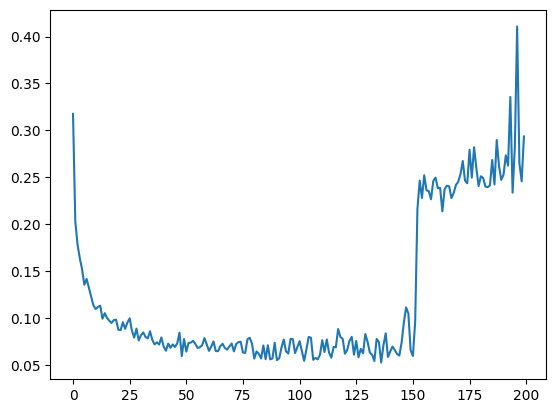

In [14]:
plt.plot(losses)

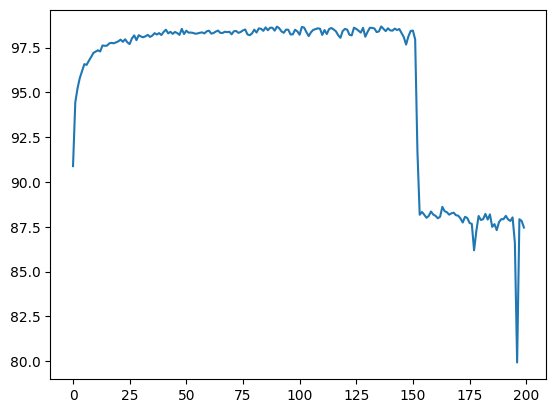

In [15]:
plt.plot(train_accuracy)

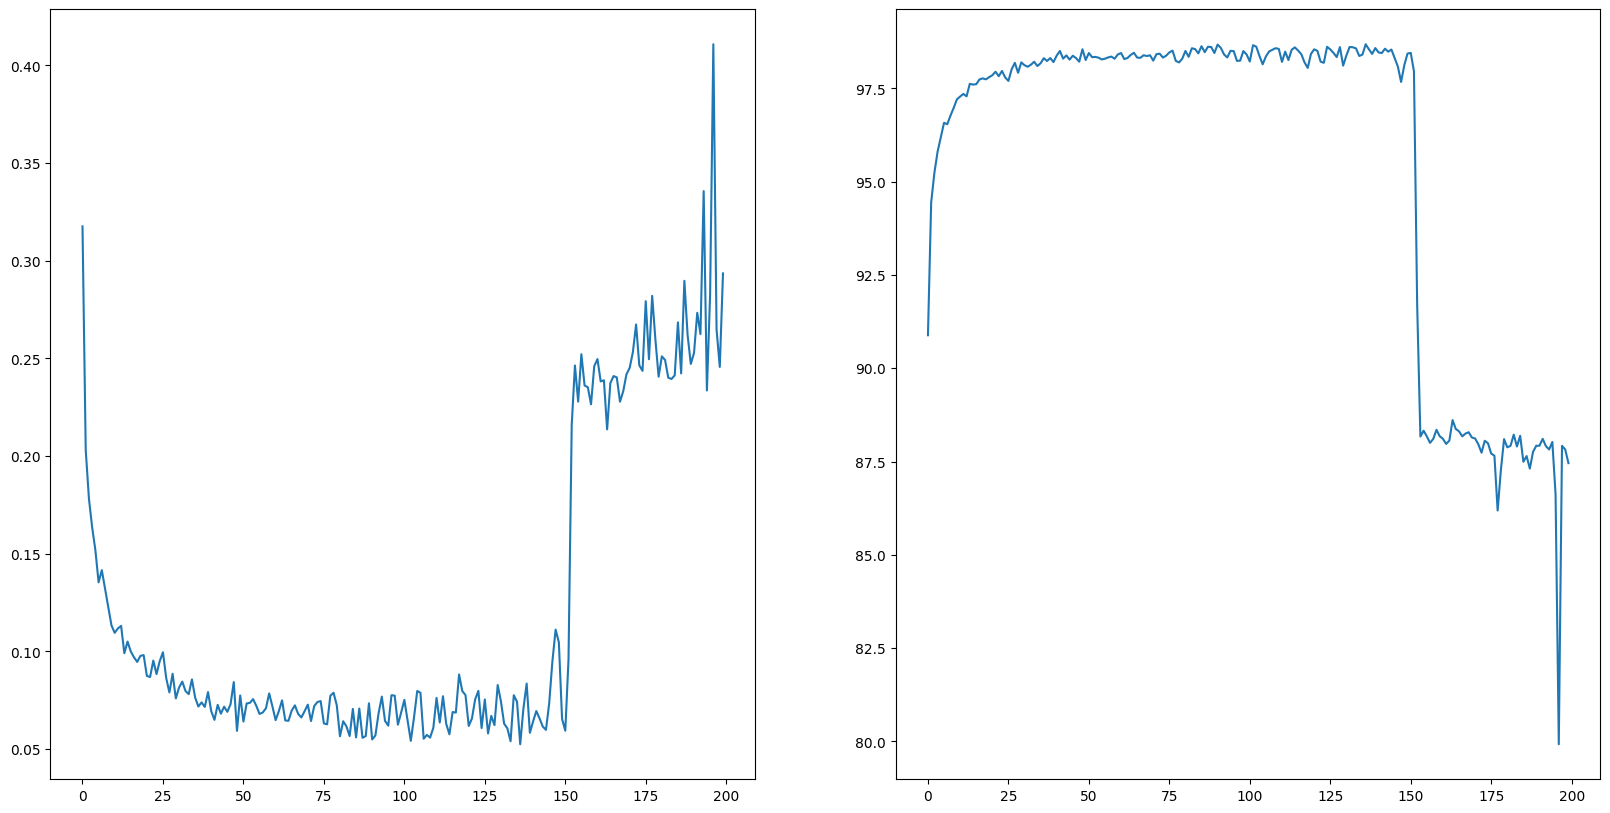

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
axs[0].plot(losses)
axs[1].plot(train_accuracy)

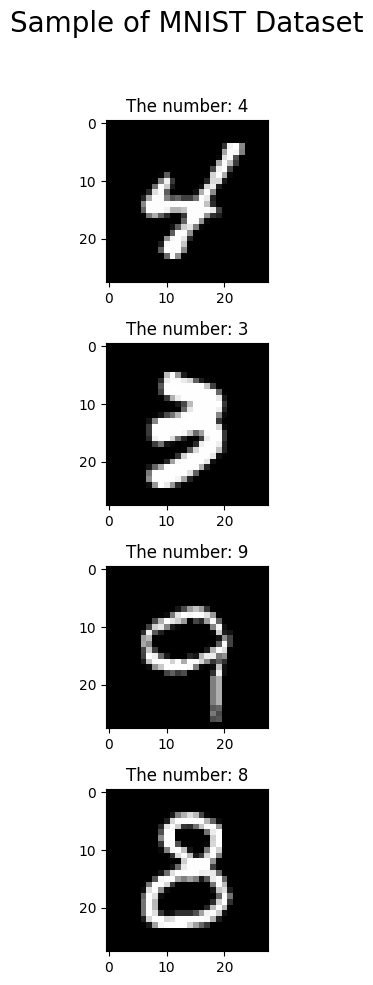

In [26]:
# schow 12 randomly iamges
fig,axs = plt.subplots(4,1,figsize=(20,10))
for ax in axs.flatten():
  # pick a random image
  random_index = np.random.randint(0,high=train_data.targets.size(0))
  img, label = train_data[random_index]
  ax.imshow(img.numpy()[0], cmap='gray')
  ax.set_title(f'The number: {label}')

plt.suptitle('Sample of MNIST Dataset',fontsize=20)
plt.tight_layout(rect=[0,0,1,.95])
plt.show()

In [ ]:
class MainLoop:
    def __init__(self, epoch, model, loss, optimizer, train_loader, test_loader):
        self.epoch = epoch
        self.model = model
        self.loss = loss
        self.optimizer = optimizer
        self.train_loader = train_loader
        self.test_loader = test_loader
        
    def train(self):
        self.model.train()
        train_accuracy=[]
        train_loss=torch.zero(self.epoch)
        for epochi in range(self.epoch):
            batch_accuracy = []
            batch_loss = []
            for X,y in train_loader:
                yHAT = self.model(X)
                lossfunc = self.loss(yHAT, y)
                
                self.optimizer.zero_grad()
                self.loss.backward()
                self.optimizer.step()
                
                batch_accuracy.append( 100*torch.mean((torch.argmax(yHAT,axis=1) == y).float()) )
                batch_loss.append( lossfunc.item() )
                
            train_accuracy.append(np.mean(batch_accuracy))
            train_loss[epochi] = np.mean(batch_loss)
            
        return train_accuracy, train_loss 

    def test(self):
        train_accuracy, train_loss = self.train()
        self.model.eval()
        pass
    def returns():
        pass